In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [8]:
df = pd.read_csv('convertcsv.csv')

Text(-2.5749999999999886, 0.5, 'Likes Given')

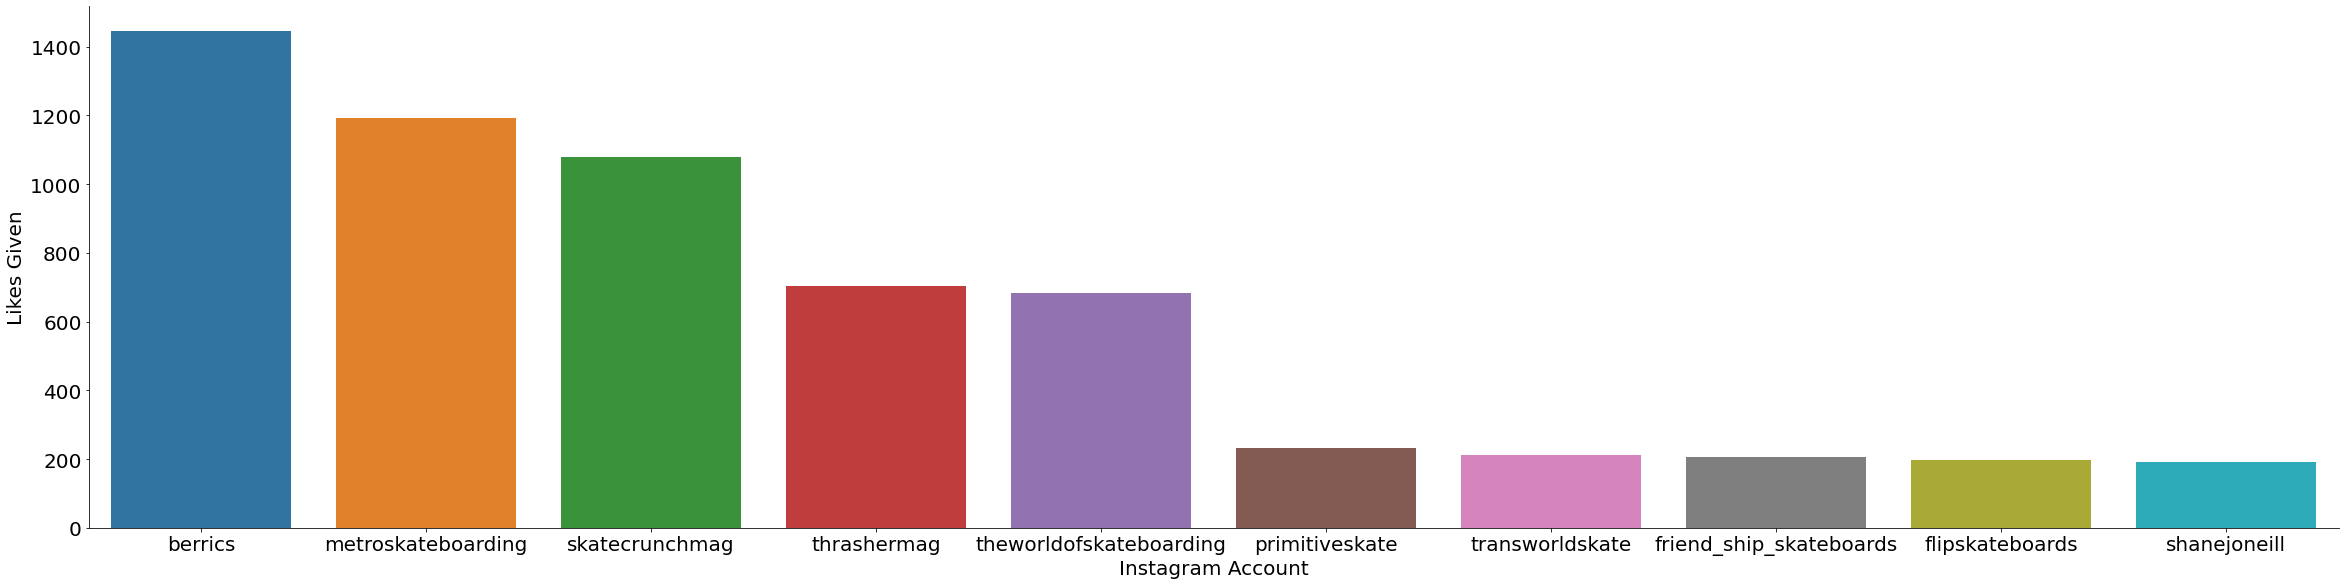

In [9]:
#counting each time I give an account a like
order_data = df['media_likes/1'].value_counts().iloc[:10].index
sns.catplot(x='media_likes/1',
           kind='count',
            height=8, 
            aspect=4,
           data=df, order = order_data)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Instagram Account', size = 20)
plt.ylabel('Likes Given', size = 20)

In [10]:
#dropping which account I liked, and comment likes
df = df.drop(['comment_likes/0','media_likes/1','comment_likes/1'], axis=1)

In [11]:
#Assigning one like instance to each date
df['Likes'] = 1
df.columns = ['Date','Likes']
df.Date = pd.to_datetime(df.Date)
df.set_index('Date', inplace = True)
df.head()

,Likes
Date,
2020-05-08 12:59:43+00:00,1
2020-05-08 09:37:10+00:00,1
2020-05-08 09:36:47+00:00,1
2020-05-08 09:36:40+00:00,1
2020-05-08 09:36:23+00:00,1


In [12]:
#summing up every like that happens in a given 24 hour period
likes_df = df.resample('D').size().reset_index()
df = pd.DataFrame(likes_df)
df.columns = ['ds','y']
df['ds'] = df['ds'].dt.tz_localize(None)
df.head()

,ds,y
0,2012-02-05,6
1,2012-02-06,0
2,2012-02-07,0
3,2012-02-08,3
4,2012-02-09,0


In [13]:
p = Prophet(yearly_seasonality=True,changepoint_prior_scale=0.9)
p.fit(df)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
future = p.make_future_dataframe(periods = 365, include_history = True)
forecast = p.predict(future)

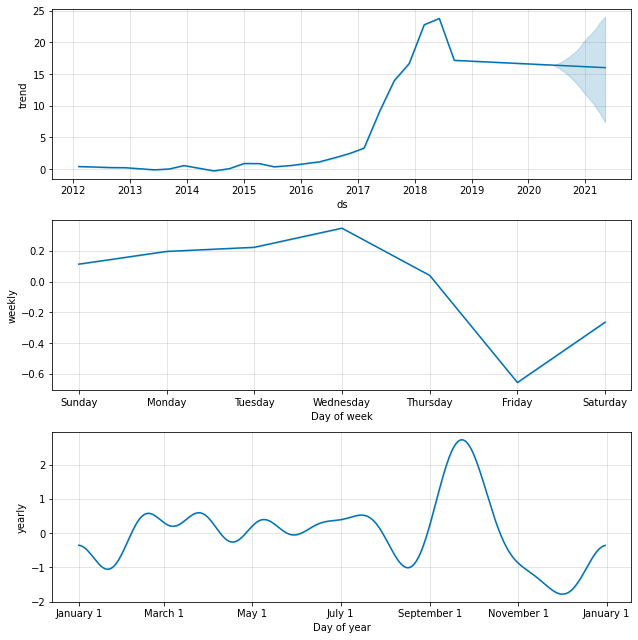

In [15]:
figure3 = p.plot_components(forecast)

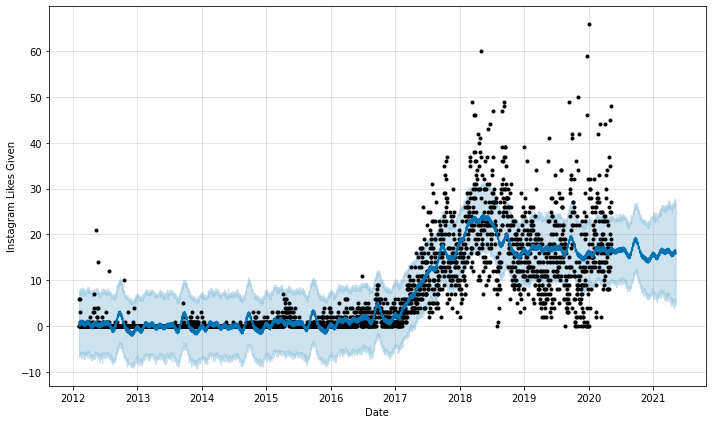

In [16]:
figure = p.plot(forecast, xlabel='Date', ylabel='Instagram Likes Given')